## REMOTE GRAPH: LangGraph Platform


In [ ]:
from langgraph.pregel.remote import RemoteGraph
from langgraph_sdk import get_sync_client
from langgraph.types import Command

url = "http://127.0.0.1:8000"
graph_name = "main_graph"
sync_client = get_sync_client(url=url)
remote_graph = RemoteGraph(graph_name, url=url)

# create a thread (or use an existing thread instead)
thread = sync_client.threads.create()

# obtain the graph with the thread config
config = {"configurable": {"thread_id": thread["thread_id"]}}

In [ ]:
# Define the input and invoke
user_input = "Ey, puedes resumirme 10 mensajes?"
message_input = {"messages": [{"role": "human", "content": user_input}]}
for event in remote_graph.stream(message_input, config, stream_mode="updates"):
    print(event)
    print("\n")


In [ ]:
# Continue the action
for event in remote_graph.stream(
    # provide continue
    Command(resume={"action": "continue"}),
    config,
    stream_mode="updates",
):
    print(event)
    print("\n")

## LOCAL AGENTS SERVERLESS

#### OAKLANG

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
from frank.workflow_builder import WorkflowBuilder
from frank.config.layouts.simple_oak_config_graph import SimpleOakConfigGraph
from frank.entity.models.stategraph import SharedState
from frank.utils.common import read_yaml
from frank.utils.logger import setup_logging
from frank.constants import *

## Read the config.yaml
config = read_yaml(CONFIG_FILE_PATH)

## Setup logging Configuration
setup_logging(config)

## Workflow Configuration for the main graph
workflow_builder = WorkflowBuilder(
    config=SimpleOakConfigGraph, 
    state_schema=SharedState, 
    checkpointer=MemorySaver(),
)
graph = workflow_builder.compile() # compile the graph
# workflow_builder.display_graph(save=True, filepath="artifacts/simple_graph.png") # update the graph artifact

In [ ]:
# Define the RunnableConfig
config = {"configurable": {"thread_id": "001"}}

In [ ]:
# Define the input
user_input = "What is the evolution of feebas?; and could you give me random movements of the evolution?"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

#### HUMAN IN THE LOOP 

>https://langchain-ai.github.io/langgraph/how-tos/human_in_the_loop/review-tool-calls/ 

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import Command
from frank.workflow_builder import WorkflowBuilder
from frank.config.layouts.oak_human_loop_config_graph import OakHumanLoopConfigGraph
from frank.entity.models.stategraph import SharedState
from frank.utils.common import read_yaml
from frank.utils.logger import setup_logging
from frank.constants import *

## Read the config.yaml
config = read_yaml(CONFIG_FILE_PATH)

## Setup logging Configuration
setup_logging(config)

## Workflow Configuration for the main graph
workflow_builder = WorkflowBuilder(
    config=OakHumanLoopConfigGraph, 
    state_schema=SharedState, 
    checkpointer=MemorySaver(),
)
graph = workflow_builder.compile() # compile the graph
# workflow_builder.display_graph(save=True, filepath="artifacts/human_graph.png") # update the graph artifact

In [ ]:
# Define the RunnableConfig
config = {"configurable": {"thread_id": "001"}}

In [ ]:
# DEMO 1
# Define the input
user_input = "Hi!"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
# Define the input
user_input = "Could you give me random movements of pickachu, and what is his evolutions?"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
# Define the input
user_input = "I would like to capture all the pokemon of Ireland"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "feedback", 
                                "data": "Sorry, I meant to capture all the pokemon of Iceland... NOT IRELAND"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "continue"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
### DEMO 2: two calls in the same stage
# Define the input
user_input = "What is the evolution of feebas?. I would like to capture/dominate all the pokemon of Ireland. By the way... Could you give me random movements of Pikachu?"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "feedback", 
                                "data": "Sorry, I meant to capture all the pokemon of Iceland... NOT IRELAND"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "continue"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

#### TEST BASIC HUMAN IN THE LOOP

In [ ]:
from typing import Any, Union
from pydantic import BaseModel
from langchain_core.messages import AnyMessage
from typing_extensions import Literal
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import Command, interrupt
from langchain_core.tools import tool
from services.llm import LLMServices
from langgraph.prebuilt import ToolNode
from langgraph.types import Command


@tool
def weather_search(city: str):
    """Search for the weather"""
    print("----")
    print(f"Searching for: {city}")
    print("----")
    if city == 'New York':
        return "Sunny!"
    else:
        return "Cloudy"
    

@tool
def sensitive_action(city: str):
    """Apply a sensitive action to a city"""
    print("----")
    print(f"Applying for: {city}")
    print("----")
    if city == 'Spain':
        return "OLE!"
    else:
        return "BOOM!"

tools=[weather_search, sensitive_action]


model = LLMServices.model.bind_tools(
    tools
)

class State(MessagesState):
    """Simple state."""


async def call_llm(state: Union[list[AnyMessage], dict[str, Any], BaseModel]) -> dict[str, list]:
    messages = state["messages"]
    response = await model.ainvoke(messages)
    # We return a list, because this will get added to the existing list
    print(f"Printing Model State: {state}")
    return {"messages": [response]}


def human_review_node(state) -> Command[Literal["call_llm", "run_tool"]]:
    last_message = state["messages"][-1]
    sensitive_tool_name = "sensitive_action"

    # Separate sensitive and non-sensitive tool calls
    sensitive_calls = [
        tool_call for tool_call in last_message.tool_calls
        if tool_call["name"] == sensitive_tool_name
    ]
    
    # If no sensitive tools, run all tools immediately
    if not sensitive_calls:
        return Command(goto="run_tool")

    # Get the *first* sensitive tool call to ask for review
    tool_call = sensitive_calls[0]

    # Interrupt and ask human for feedback
    human_review = interrupt({
        "question": "Is this correct?",
        "tool_call": tool_call,
    })

    review_action = human_review["action"]
    review_data = human_review.get("data")

    if review_action == "continue":
        return Command(goto="run_tool")

    elif review_action == "feedback":
        # ToolMessage for sensitive tool feedback
        feedback_tool_message = {
            "role": "tool",
            "content": review_data,
            "name": tool_call["name"],
            "tool_call_id": tool_call["id"],
        }

        # Return in same order as original tool_calls
        all_tool_messages = []

        for call in last_message.tool_calls:
            if call["id"] == tool_call["id"]:
                all_tool_messages.append(feedback_tool_message)
            else:
                # passthrough (empty response for untouched tools)
                all_tool_messages.append({
                    "role": "tool",
                    "content": "",
                    "name": call["name"],
                    "tool_call_id": call["id"],
                })

        return Command(
            goto="call_llm",
            update={"messages": all_tool_messages}
        )

def route_after_llm(state) -> Literal["end", "review"]:
    if len(state["messages"][-1].tool_calls) == 0:
        return "end"
    else:
        return "review"


builder = StateGraph(State)
builder.add_node(call_llm)

builder.add_node(ToolNode(tools=tools,
         name="run_tool"))

builder.add_node(human_review_node)
builder.add_edge(START, "call_llm")


builder.add_conditional_edges(source="call_llm", 
                              path=route_after_llm,
                              path_map={
                                  "end": END, # If last call `tools`, then end.
                                  "review": "human_review_node", # Human review in the loop.
                                  }
)

builder.add_edge("run_tool", "call_llm")

# Set up memory
memory = MemorySaver()

# Add
graph = builder.compile(checkpointer=memory)

In [ ]:
# Define the RunnableConfig
config = {"configurable": {"thread_id": "001"}}

In [ ]:
# Define the input
user_input = "Could you give me the wheater of New York and made me an sensitive action to Spain"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
# Define the input
user_input = "Made me an sensitive action to Spain. Also Could you give me the wheater of New York"
message_input = {"messages": [{"role": "human", "content": user_input}]}

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "feedback", 
                                "data": "Sorry, I mean, I wanted the Sensitive action to Los Angeles, NOT Spain. Sorry by my mistake..."})

# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

In [ ]:
message_input = Command(resume={"action": "continue"})
# Asynchronous function to handle the async generator
async def process_stream():
    async for event in graph.astream(message_input, config, stream_mode="updates"):
        print(event)
        print("\n")

# Directly await the function if you're in a notebook or similar environment
await process_stream()

#### AUTOGEN CORE + LANGCHAIN + LANGGRAPH

>https://microsoft.github.io/autogen/stable/user-guide/core-user-guide/framework/distributed-agent-runtime.html

>https://microsoft.github.io/autogen/stable/user-guide/core-user-guide/core-concepts/architecture.html

>https://devblogs.microsoft.com/semantic-kernel/semantic-kernel-and-autogen-part-2/

>https://github.com/Azure-Samples/az-ai-kickstarter


#### How Runtime AutoGen works
A distributed runtime, as shown in the diagram above, consists of a host servicer and multiple workers. The host servicer facilitates communication between agents across workers and maintains the states of connections. The workers run agents and communicate with the host servicer via gateways. They advertise to the host servicer the agents they run and manage the agents’ lifecycles.

Agents work the same way as in the standalone runtime so that developers can switch between the two runtime types with no change to their agent implementation.

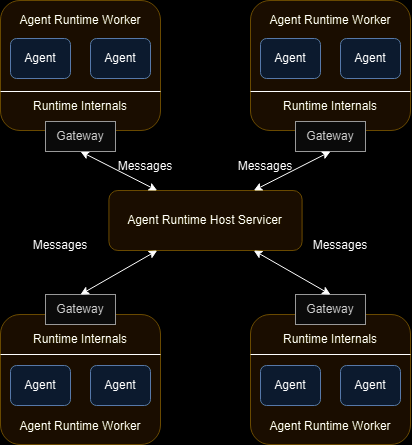


#### Shared Runtime Semantic-Lernel and Autogen

A central design goal of this convergence effort is the adoption of a common runtime and interfaces. By aligning the execution model, both frameworks can leverage shared abstractions for agent orchestration and process management.

Semantic Kernel is adding connectors to support integrating agents from other services and libraries (such as OpenAI Assistant agent and Azure AI Agents) and now, with AutoGen agents

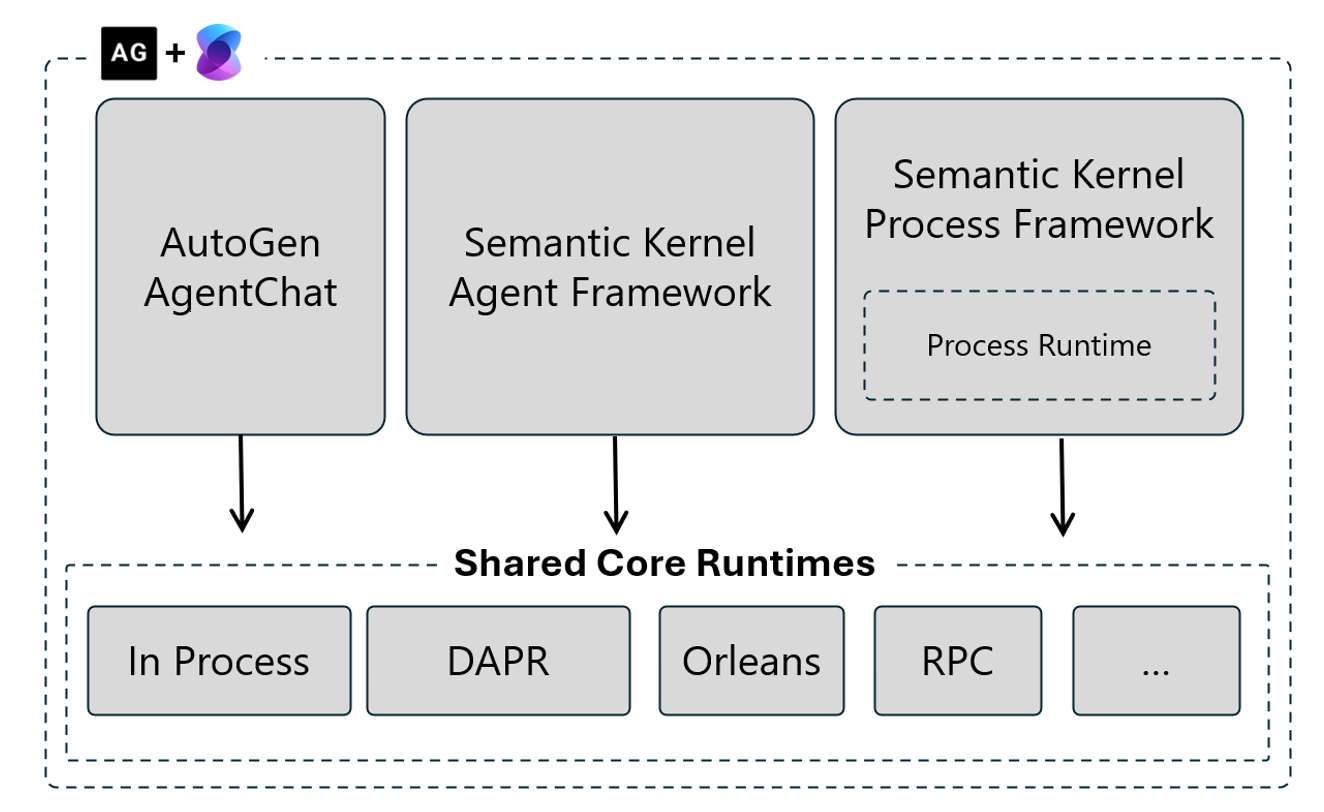



#### Semantic-Kernel App's Architecture
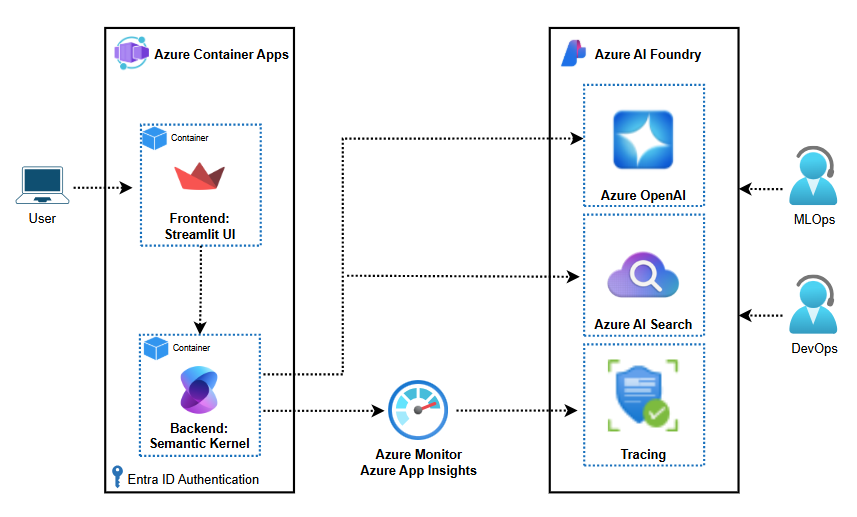

In [ ]:
### AUTOGEN WRAPPER

from autogen_core import AgentId, MessageContext, RoutedAgent, SingleThreadedAgentRuntime, message_handler
from langgraph.graph.state import CompiledStateGraph
from pydantic import BaseModel, ConfigDict
from langgraph.types import Command, RunnableConfig
from typing import List, Optional, Dict

class MessageWrapperAutogenState(BaseModel):
    content: Optional[str] = None
    command: Optional[Command] = None
    events: Optional[List[Dict]] = []
    model_config = ConfigDict(arbitrary_types_allowed=True)


class LangGraphToolUseAgent(RoutedAgent):
    def __init__(self, description: str, graph: CompiledStateGraph, config: RunnableConfig) -> None:
        super().__init__(description)
        self._app = graph
        self.config = config

    @message_handler
    async def handle_user_message(self, message: MessageWrapperAutogenState, ctx: MessageContext) -> MessageWrapperAutogenState:
        # Build input for astream depending on message type
        if isinstance(message, MessageWrapperAutogenState):
            input_data = {"messages": [{"role": "human", "content": message.content}]} if message.content else message.command 
        else:
            raise ValueError("Unsupported message type")


        event_list = message.events
        async for event in self._app.astream(input_data, self.config, stream_mode="updates"):
            print("Event streamed:", event)
            event_list.append(event)
        
        # Extract the last content for output (this "get_last_event" filter_content logic inline)
        if "__interrupt__" not in event_list[-1]:
            output = event_list[-1][next(iter(event_list[-1]))]['messages'][-1].content
        else:
            output = ""

        return MessageWrapperAutogenState(content=output, events=event_list)

In [ ]:
# Define the RunnableConfig
config = {"configurable": {"thread_id": "001"}}

In [ ]:
runtime = SingleThreadedAgentRuntime()
await LangGraphToolUseAgent.register(
    runtime,
    "oaklang_langgraph",
    lambda: LangGraphToolUseAgent(
        description="Tool use agent",
        config=config,
        graph=graph,
    ),
)
agent = AgentId("oaklang_langgraph", key="default")

In [ ]:
# Start the runtime
runtime.start()

In [ ]:
# Example with regular message
response = await runtime.send_message(
    MessageWrapperAutogenState(content="What is the evolution of feebas?; and could you give me random movements of the evolution?"),
    agent
)

In [ ]:
response.events

In [ ]:
response.content

In [ ]:
# Example with regular message
response = await runtime.send_message(
    MessageWrapperAutogenState(content='I want capture all pokemon of Ireland'),
    agent
)


In [ ]:
response.content

In [ ]:
response.events[-1]

In [ ]:
# Example with command message
response = await runtime.send_message(
    MessageWrapperAutogenState(command=Command(resume={"action": "feedback", "data": "Sorry, I just want to capture all the pokemon of Iceland... NOT IRELAND"})),
    agent
)


In [ ]:
response.events[-1]

In [ ]:
# Example with regular message
response = await runtime.send_message(
    MessageWrapperAutogenState(command=Command(resume={"action": "continue"})),
    agent
)

In [ ]:
response.content

In [ ]:
# Stop the runtime
await runtime.stop()

## AZURE AI FOUNDRY TRACE MONITORING

#### TRACE MONITORING AUTOGEN + LANGGRAPH (NATIVE AND NESTED)

>https://learn.microsoft.com/en-us/azure/ai-foundry/how-to/develop/langchain

When AIInferenceInstrumentor and AzureAIInferenceTracer are both enabled, there are running into issues like:

* Context mismatch: spans not appearing under the correct parent.

* Span duplication: multiple root spans instead of nested ones.

* Runtime errors: likely related to uninstrumented or mismatched spans.


In [ ]:
## A
import os

application_insights_connection_string = os.environ["AZURE_APP_INSIGHT_CONNECTION_STRING"]

## B

# from azure.ai.projects import AIProjectClient
# from azure.identity import DefaultAzureCredential # NOTE USE ASYNC DEFAULT CREDENTIALS

# project_client = AIProjectClient.from_connection_string(
#     credential=DefaultAzureCredential(),
#     conn_str="<your-project-connection-string>",
# )

# application_insights_connection_string = project_client.telemetry.get_connection_string()

In [ ]:
from langchain_azure_ai.callbacks.tracers import AzureAIInferenceTracer

langchain_tracer = AzureAIInferenceTracer(
    connection_string=application_insights_connection_string,
    enable_content_recording=True,
)

In [ ]:
# Define the thread_id
config = {"configurable": {"thread_id": "001"}, "callbacks": [langchain_tracer]}

In [ ]:
runtime = SingleThreadedAgentRuntime()
await LangGraphToolUseAgent.register(
    runtime,
    "oaklang_langgraph",
    lambda: LangGraphToolUseAgent(
        description="Tool use agent",
        config=config,
        graph=graph,
    ),
)
agent = AgentId("oaklang_langgraph", key="default")

In [ ]:
# import os
from opentelemetry import trace
# from azure.monitor.opentelemetry import configure_azure_monitor
# from azure.ai.inference.tracing import AIInferenceInstrumentor 
# from opentelemetry.instrumentation.threading import ThreadingInstrumentor

# NOTE: instrument_inference (bool, optional): Whether to instrument the inference calls. Defaults to True.
# application_insights_connection_string = os.environ["AZURE_APP_INSIGHT_CONNECTION_STRING"]
# configure_azure_monitor(connection_string=application_insights_connection_string)
# ThreadingInstrumentor().instrument(enable_content_recording=True)
# instrumentor = AIInferenceInstrumentor() 
# instrumentor.instrument(enable_content_recording=True) 

scenario = "my_app_monitoring" # os.path.basename(__file__)
tracer = trace.get_tracer(__name__)


with tracer.start_as_current_span(scenario) as parent_span:
    runtime.start()
    response = await runtime.send_message(
        MessageWrapperAutogenState(content="What is the evolution of feebas?; and could you give me random movements of the evolution?"),
        agent
    )    
    print(response.content)
    await runtime.stop()

# 🤖 LangGraph + AutoGen: Resumen

## 🧠 ¿Qué aporta cada uno?

### 📘 Ventajas de usar AutoGen con LangGraph

**AutoGen destaca por:**
- Gestión de múltiples agentes con roles definidos (`user_proxy`, `assistant`, `coder`, `critic`, etc.).
- Supervisor integrado para coordinar agentes automáticamente.
- Soporte para memoria, múltiples rondas y auto-detención.
- Ideal como "orquestadora" de agentes sobre un backend.

**LangGraph destaca por:**
- Flujos **determinísticos y controlables** mediante nodos y condiciones.
- Ideal para workflows estructurados, decisiones condicionales y visualización.
- Cada nodo puede representar un paso lógico o un agente.

## 🧩 Supervisor vs Orquestador de Agentes 

### 💡 ¿Cuál es la diferencia?

| Rol            | ¿Qué hace?                                                                 | Nivel                   | Equivalente humano                   |
|----------------|-----------------------------------------------------------------------------|--------------------------|--------------------------------------|
| **Supervisor** | Evalúa resultados, valida decisiones, interviene si algo sale mal.         | Operativo     | Jefe de equipo que revisa entregas   |
| **Orquestador**| Decide qué agentes participan, cuándo, en qué orden y cómo se comunican.   | Estrarégico | Director de proyecto                 |


### 📌 Key Points

- El **supervisor** suele ser un **agente dentro del sistema**, que actúa como evaluador o controlador de calidad.
- El **orquestador** es responsable de **diseñar y controlar el flujo general** de la interacción entre agentes.

---

## ¿Dónde es mejor ubicar un **supervisor**?

### Opción 1: **Supervisor en AutoGen**

**✅ Ventajas:**
- Supervisión reflexiva integrada de forma predeterminada.
- Maneja colaboración dinámica entre agentes sin necesidad de lógica explícita.
- Facilita la comunicación natural tipo "chat" entre múltiples agentes.

**❌ Contras:**
- Menor previsibilidad del flujo en entornos de producción controlada.
- Difícil de representar, visualizar, predecir o auditar paso a paso.

### Opción 2: **Supervisor en LangGraph**

**✅ Ventajas:**
- Control total del flujo, decisiones, loops, human review y routing.
- Ideal para despliegues críticos, donde la trazabilidad es clave.
- Fácil de visualizar y depurar.

**❌ Contras:**
- Tienes que codificar la lógica supervisora manualmente.
- Menos dinámico y espontaneidad en colaboración espontánea e interacción entre agentes.

---

## 🚀 ¿Qué hacer si quiero agentes personalizados con alta trazabilidad y un supervisor a medida?

### 🛠️ LangGraph como estructura de agentes
- Cada grafo es una tool con lógica definida.
- Ideal para sistemas robustos y predecibles.
- Mejor para funciones deterministas o tareas bien definidas.

### 🤝 AutoGen como coordinador de alto nivel

- AutoGen se encarga del flujo y supervisión.
- Dentro de cada agente, puedes usar LangGraph para definir su comportamiento interno.
- Ventajoso para casos donde la colaboración multiagentes requiere razonamiento fluido.

---

### 📌 Key Points

- Usa **AutoGen** si priorizas **colaboración natural, reflexiva y automatizada**.
- Usa **LangGraph** si quieres **control total del flujo y reglas personalizadas**.
- Para lo mejor de ambos mundos **combina LangGraph como tools complejas + AutoGen como capa de razonamiento y coordinación dinámica (supervisor).** Se empleará AutoGen para coordinación dinámica y razonamiento, mientras defines el comportamiento interno de cada agente con LangGraph.